# 01. R모델링 기초

- R의 기반이 되는 S 언어는 Chambers and Hastie( 1992 ) (일반적으로 The White Book으로 알려짐)가 출판된 이후 풍부한 데이터 분석 환경을 갖춤
- 이 S 버전에는 기호 모델 공식, 모델 행렬, 데이터 프레임은 물론 데이터 분석을 위한 표준 객체 지향 프로그래밍 방법과 같이 오늘날 R 사용자에게 친숙한 표준 인프라 구성 요소가 도입
    - 이러한 사용자 인터페이스는 그 이후로 실질적으로 변경되지 않았습니다.

<br>

## 01.01. 기본 R모델링
- 주변 온도와 분당 귀뚜라미 울음소리 사이의 관계에 대해 Mangiafico( 2015 ) 를 통해 McDonald( 2009 ) 의 실험 데이터

In [4]:
library(tidyverse)
ggplot2::theme_set(theme_bw())

In [5]:
data(crickets, package = "modeldata")
names(crickets)

[1] "species" "temp"    "rate"

In [6]:
crickets %>% head()

species,temp,rate
<fct>,<dbl>,<dbl>
O. exclamationis,20.8,67.9
O. exclamationis,20.8,65.1
O. exclamationis,24.0,77.3
O. exclamationis,24.0,78.7
O. exclamationis,24.0,79.4
O. exclamationis,24.0,80.4


<br>

- 데이터는 각 종에 대해 상당히 선형적인 경향을 나타냄
    - 특정 온도에서 'O. exclaimis'는 다른 종보다 분당 더 많이 우는 것처럼 보임 

`geom_smooth()` using formula = 'y ~ x'


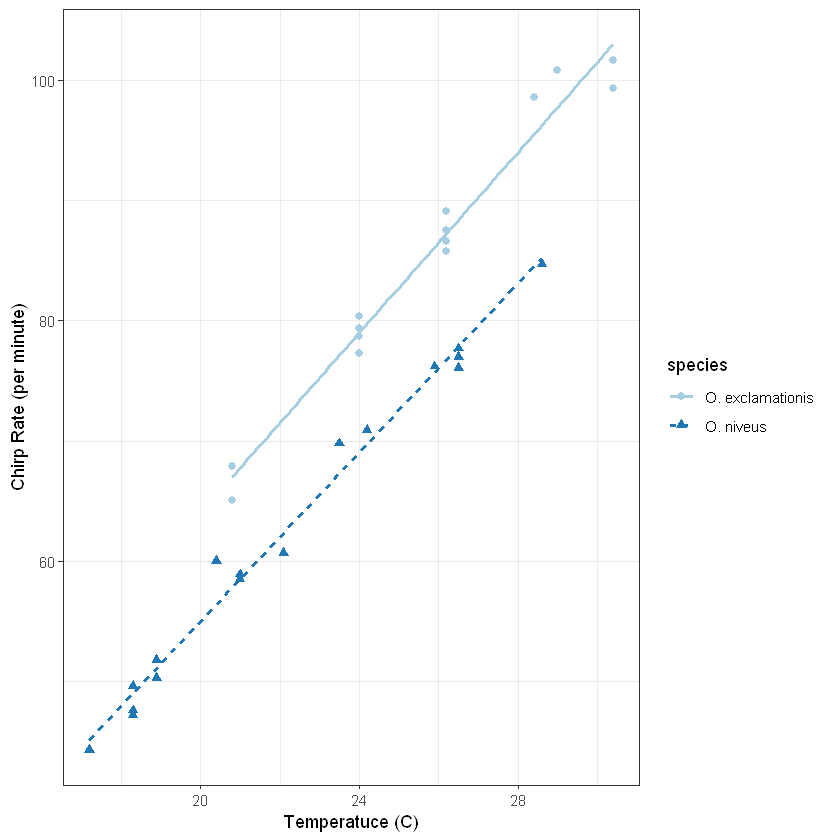

In [7]:
ggplot(crickets,
       aes(temp, rate, color = species, pch = species, lty = species)) + 
    geom_point(size = 2) + 
    geom_smooth(method = lm, se = F, alpha = 0.5) + 
    scale_color_brewer(palette = "Paired") + 
    labs(x = "Temperatuce (C)", y = "Chirp Rate (per minute)")

<br>

- 추론 모델의 경우 분석가는 데이터를 보기 전에 다음과 같은 귀무 가설을 지정가능
    - 온도는 우는 속도에 영향을 주지 않음
    - 종별 우는 속도에는 차이가 없음



<br>

- `rate ~ temp + species` 공식은 각 종에 대해 서로 다른 y절편을 사용하여 모델을 생성
- 회귀선의 기울기도 종마다 상이하며, 이 구조를 수용하기 위해 상호작용 항을 모델에 추가 할 수 있음
    - `rate ~ temp + species + temp:species`
    - `rate ~ (temp + species)^2`
    - `rate ~ temp * species`

<br>

#### 상호작용 모형

In [9]:
interaction_fit <- lm(rate ~ (temp + species)^2, data = crickets)
summary(interaction_fit)


Call:
lm(formula = rate ~ (temp + species)^2, data = crickets)

Residuals:
    Min      1Q  Median      3Q     Max 
-3.7031 -1.3417 -0.1235  0.8100  3.6330 

Coefficients:
                      Estimate Std. Error t value Pr(>|t|)    
(Intercept)           -11.0408     4.1515  -2.659    0.013 *  
temp                    3.7514     0.1601  23.429   <2e-16 ***
speciesO. niveus       -4.3484     4.9617  -0.876    0.389    
temp:speciesO. niveus  -0.2340     0.2009  -1.165    0.254    
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 1.775 on 27 degrees of freedom
Multiple R-squared:  0.9901,	Adjusted R-squared:  0.989 
F-statistic: 898.9 on 3 and 27 DF,  p-value: < 2.2e-16


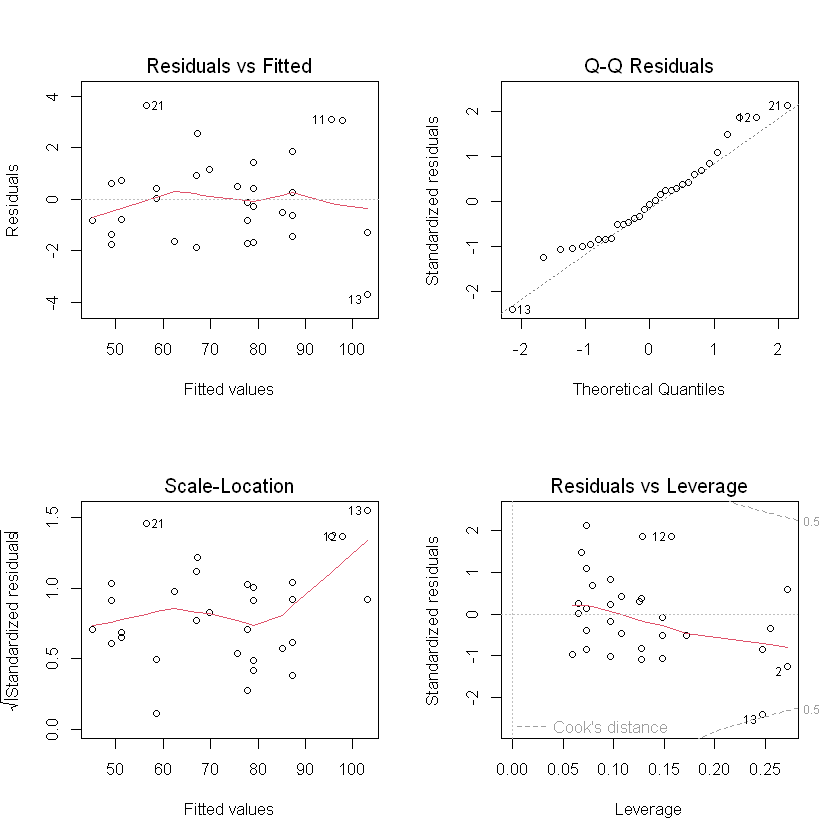

In [10]:
par(mfrow = c(2, 2))

plot(interaction_fit)

<br>

#### **상호작용 항이 꼭 필요한지에 대해서 평가**
$\rightarrow$ 상호작용 모델과 주효과 모델의 비교

<br>

- 주효과 모형 생성

In [12]:
main_effect_fit <- lm(rate ~ temp + species, data = crickets)

<br>

#### ANOVA 검정 
* 통계 검정은 0.25의 p-값

- P-value > 0.05 => 귀무가설 기각 불가 => **상호작용 항이 유의하지 않음**

In [11]:
anova(main_effect_fit, interaction_fit)

,Res.Df,RSS,Df,Sum of Sq,F,Pr(>F)
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1,28,89.34987,NA,NA,NA,NA
2,27,85.07409,1,4.275779,1.357006,0.2542464


<br>

#### 선택된 모델에 대한 해석
- 각 종의 우는 소리 속도는 온도가 1도 증가함에 따라 3.6회씩 증가
    - 이 항은 p-값으로 입증되는 것처럼 강력한 통계적 유의성
- 종 항의 값은 -10.07
    - 이는 모든 온도 값에서 O. niveus의 우는 소리 속도가 'O. exclaimis' 보다 분당 약 10회 더 적다는 것을 나타냄
- 온도 항과 유사하게 종 효과는 매우 작은 p-값을 가짐
- 이 분석에서 유일한 문제는 절편 값입니다. 이는 0°C에서 두 종 모두에 대해 분당 음의 울음 수가 있음을 나타

    이는 말이 되지 않지만 데이터는 17.2°C까지만 낮아지며 0°C에서 모델을 해석하는 것은 추정에 불과
    
    **즉, 온도 값의 적용 가능한 범위 내에서 모델 적합성이 좋으며. 관찰된 온도 범위로 제한되어야 함**



In [13]:
summary(main_effect_fit)


Call:
lm(formula = rate ~ temp + species, data = crickets)

Residuals:
    Min      1Q  Median      3Q     Max 
-3.0128 -1.1296 -0.3912  0.9650  3.7800 

Coefficients:
                  Estimate Std. Error t value Pr(>|t|)    
(Intercept)       -7.21091    2.55094  -2.827  0.00858 ** 
temp               3.60275    0.09729  37.032  < 2e-16 ***
speciesO. niveus -10.06529    0.73526 -13.689 6.27e-14 ***
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 1.786 on 28 degrees of freedom
Multiple R-squared:  0.9896,	Adjusted R-squared:  0.9888 
F-statistic:  1331 on 2 and 28 DF,  p-value: < 2.2e-16


<br>

- 실험에서 관찰되지 않은 온도에서 처프 속도를 추정해야 하는 경우 예측을 시행
- 예측을 위해 모델 객체와 새로운 값의 데이터 프레임이 필요
- 예를 들어, 모델은 15°C에서 20°C 사이의 온도에서 'O. exclaimis' 의 우는 소리 속도를 다음을 통해 계산할 수 있다고 추정

<br>

### 예측 (```predict()```)
- ```na.action``` : 결측값 처리 방식 
    - (```na.fail``` : 결측값 등장시 예측 중단/ ```na.omit``` : 결측값 제외하고 예측)

In [15]:
new_values <- data.frame(species = "O. exclamationis", temp = 15:20)
predict(main_effect_fit, new_values)

1        2        3        4        5        6 
46.83039 50.43314 54.03589 57.63865 61.24140 64.84415

<br>

## 01.02. `TidyModel`

| Function | Package | Code |
| -- | -- | -- |
| ```lda()``` | MASS | ```predict(object)```|
| ```glm()``` | stats | ```predict(object, type = "response")```|
| ```gbm()``` | gbm | ```predict(object, type = "response", n.trees)```|
| ```mda()``` | mda | ```predict(object, type = "posterior")```|
| ```rpart()``` | rpart | ```predict(object, type = "prob")```|
| ```various``` | RWeka | ```predict(object, type = "probability")```|
| ```logitboost()``` | LogitBoost | ```predict(object, type = "raw", nIter)```|
| ```pamr.train()``` | pamr | ```predict(object, type = "posterior")```|

In [17]:
new_values$temp[1] <- NA

In [18]:
predict(main_effect_fit, new_values, na.action = na.pass) # 결측값 무시
predict(main_effect_fit, new_values, na.action = na.omit) # 결측값 제거
predict(main_effect_fit, new_values, na.action = na.fail) # 결측값 직면 시 오류

1        2        3        4        5        6 
      NA 50.43314 54.03589 57.63865 61.24140 64.84415

2        3        4        5        6 
50.43314 54.03589 57.63865 61.24140 64.84415

ERROR: Error in na.fail.default(structure(list(temp = c(NA, 16L, 17L, 18L, 19L, : missing values in object


<br>

### tidy한 객체 표현

#### 각 설명변수와 반응변수와의 상관성 검정

In [24]:
library(tidyverse)
library(tidymodels)

In [25]:
data(mtcars)

In [26]:
corr_res <- map(mtcars %>% select(-mpg), cor.test, y = mtcars$mpg)

In [27]:
corr_res[[1]]


	Pearson's product-moment correlation

data:  .x[[i]] and mtcars$mpg
t = -8.9197, df = 30, p-value = 6.113e-10
alternative hypothesis: true correlation is not equal to 0
95 percent confidence interval:
 -0.9257694 -0.7163171
sample estimates:
      cor 
-0.852162 


- `broom::tidy()` 적용

In [28]:
tidy(corr_res[[1]])

estimate,statistic,p.value,parameter,conf.low,conf.high,method,alternative
<dbl>,<dbl>,<dbl>,<int>,<dbl>,<dbl>,<chr>,<chr>
-0.852162,-8.919699,6.112687e-10,30,-0.9257694,-0.7163171,Pearson's product-moment correlation,two.sided


# 

#### 상관관계를 tidy하게 표현

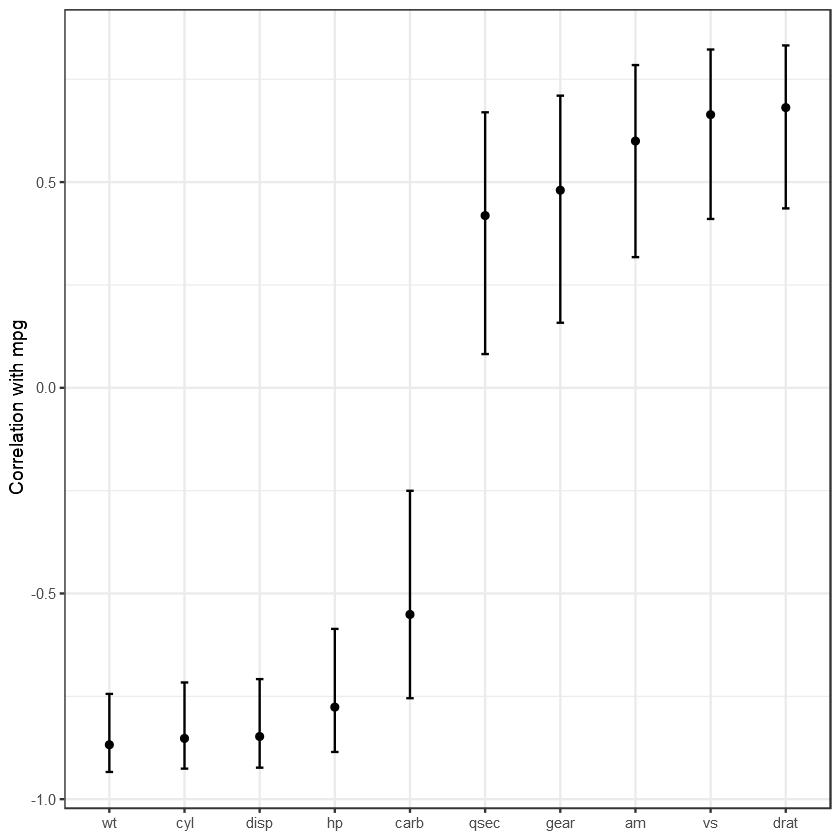

In [27]:
corr_res %>% 
  map_dfr(tidy, .id = "predictor") %>% 
  ggplot(aes(x = fct_reorder(predictor, estimate))) + 
  geom_point(aes(y = estimate)) + 
  geom_errorbar(aes(ymin = conf.low, ymax = conf.high), width = .1) +
  labs(x = NULL, y = "Correlation with mpg")

<br>

## 01.03. BASE R모델과 TIDYVERSE의 결합

#### ```dplyr::group_nest()``` : 그룹별 데이터를 리스트로 표현
#### ```unnest()```

In [30]:
crickets %>% head(3)

species,temp,rate
<fct>,<dbl>,<dbl>
O. exclamationis,20.8,67.9
O. exclamationis,20.8,65.1
O. exclamationis,24.0,77.3


- 변수 그룹별 nest

In [31]:
(split_by_species <- crickets %>%
    group_nest(species))

species,data
<fct>,"<list<tibble[,2]>>"
O. exclamationis,"20.8, 20.8, 24.0, 24.0, 24.0, 24.0, 26.2, 26.2, 26.2, 26.2, 28.4, 29.0, 30.4, 30.4, 67.9, 65.1, 77.3, 78.7, 79.4, 80.4, 85.8, 86.6, 87.5, 89.1, 98.6, 100.8, 99.3, 101.7"
O. niveus,"17.2, 18.3, 18.3, 18.3, 18.9, 18.9, 20.4, 21.0, 21.0, 22.1, 23.5, 24.2, 25.9, 26.5, 26.5, 26.5, 28.6, 44.3, 47.2, 47.6, 49.6, 50.3, 51.8, 60.0, 58.5, 58.9, 60.7, 69.8, 70.9, 76.2, 76.1, 77.0, 77.7, 84.7"


- nest된 데이터에 대한 모델링

In [32]:
(model_by_species <-  split_by_species %>% 
     mutate(model = map(data, ~ lm(rate ~ temp, data = .x))))

species,data,model
<fct>,"<list<tibble[,2]>>",<list>
O. exclamationis,"20.8, 20.8, 24.0, 24.0, 24.0, 24.0, 26.2, 26.2, 26.2, 26.2, 28.4, 29.0, 30.4, 30.4, 67.9, 65.1, 77.3, 78.7, 79.4, 80.4, 85.8, 86.6, 87.5, 89.1, 98.6, 100.8, 99.3, 101.7","-11.04085, 3.751447, 0.9107456, -1.889254, -1.693886, -0.2938856, 0.4061144, 1.406114, -1.447069, -0.6470695, 0.2529305, 1.852931, 3.099747, 3.048878, -3.703148, -1.303148, -320.2324, 41.58768, -1.78719, -0.3871904, 0.3128096, 1.31281, -1.845687, -1.045687, -0.1456873, 1.454313, 2.395816, 2.26168, -4.684636, -2.284636, 2, 66.98925, 66.98925, 78.99389, 78.99389, 78.99389, 78.99389, 87.24707, 87.24707, 87.24707, 87.24707, 95.50025, 97.75112, 103.0031, 103.0031, 0, 1, -3.741657, 0.2672612, 0.2672612, 0.2672612, 0.2672612, 0.2672612, 0.2672612, 0.2672612, 0.2672612, 0.2672612, 0.2672612, 0.2672612, 0.2672612, 0.2672612, -96.3744, 11.08577, 0.06419921, 0.06419921, 0.06419921, 0.06419921, -0.1342534, -0.1342534, -0.1342534, -0.1342534, -0.332706, -0.3868295, -0.5131175, -0.5131175, 1.267261, 1.352858, 1, 2, 1e-07, 2, 12, lm(formula = rate ~ temp, data = .x), rate ~ temp, 67.9, 65.1, 77.3, 78.7, 79.4, 80.4, 85.8, 86.6, 87.5, 89.1, 98.6, 100.8, 99.3, 101.7, 20.8, 20.8, 24, 24, 24, 24, 26.2, 26.2, 26.2, 26.2, 28.4, 29, 30.4, 30.4"
O. niveus,"17.2, 18.3, 18.3, 18.3, 18.9, 18.9, 20.4, 21.0, 21.0, 22.1, 23.5, 24.2, 25.9, 26.5, 26.5, 26.5, 28.6, 44.3, 47.2, 47.6, 49.6, 50.3, 51.8, 60.0, 58.5, 58.9, 60.7, 69.8, 70.9, 76.2, 76.1, 77.0, 77.7, 84.7","-15.38926, 3.517462, -0.8110857, -1.780294, -1.380294, 0.6197064, -0.7907706, 0.7092294, 3.633037, 0.02255989, 0.4225599, -1.646648, 2.528906, 1.166682, 0.4869976, -1.723479, -0.8234794, -0.1234794, -0.5101489, -257.4031, 51.48615, -0.9566638, 1.043336, -0.4227521, 1.077248, 3.862027, 0.1959391, 0.5959391, -1.575223, 2.470571, 1.043468, 0.2062184, -2.05987, -1.15987, -0.4598698, -1.041179, 2, 45.11109, 48.98029, 48.98029, 48.98029, 51.09077, 51.09077, 56.36696, 58.47744, 58.47744, 62.34665, 67.27109, 69.73332, 75.713, 77.82348, 77.82348, 77.82348, 85.21015, 0, 1, -4.123106, 0.2425356, 0.2425356, 0.2425356, 0.2425356, 0.2425356, 0.2425356, 0.2425356, 0.2425356, 0.2425356, 0.2425356, 0.2425356, 0.2425356, 0.2425356, 0.2425356, 0.2425356, 0.2425356, -91.21765, 14.6373, 0.195561, 0.195561, 0.1545699, 0.1545699, 0.05209195, 0.01110078, 0.01110078, -0.06404968, -0.1596957, -0.2075188, -0.3236604, -0.3646515, -0.3646515, -0.3646515, -0.5081206, 1.242536, 1.195561, 1, 2, 1e-07, 2, 15, lm(formula = rate ~ temp, data = .x), rate ~ temp, 44.3, 47.2, 47.6, 49.6, 50.3, 51.8, 60, 58.5, 58.9, 60.7, 69.8, 70.9, 76.2, 76.1, 77, 77.7, 84.7, 17.2, 18.3, 18.3, 18.3, 18.9, 18.9, 20.4, 21, 21, 22.1, 23.5, 24.2, 25.9, 26.5, 26.5, 26.5, 28.6"


- 모델링 결과

In [35]:
model_by_species %>% 
    mutate(coef = map(model, tidy)) %>% 
    select(species, coef) %>% 
    unnest(cols = c(coef))

species,term,estimate,std.error,statistic,p.value
<fct>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>
O. exclamationis,(Intercept),-11.040848,4.7654774,-2.316840,3.898993e-02
O. exclamationis,temp,3.751447,0.1838038,20.410068,1.100375e-10
O. niveus,(Intercept),-15.389255,2.3467153,-6.557785,9.074321e-06
O. niveus,temp,3.517462,0.1047334,33.584894,1.565616e-15


<br>

## 01.04. TIDYMODELS

In [46]:
library(tidymodels)

<br>

#### 패키지간 함수 충돌 시 정리

<br>

#### ```conflicted::conflict_prefer()``` : 개별 충돌 함수에 대해 사용할 함수 정의

In [48]:
library(conflicted)
conflict_prefer("filter", winner = "dplyr")

[conflicted] Will prefer dplyr::filter over any other package


<br>

#### ```tidymodels::tidymodels_prefer()``` : tidymodels 함수의 가장 일반적인 충돌을 처리

In [36]:
tidymodels_prefer(quiet = FALSE)

[conflicted] Will prefer agua::refit over any other package.
[conflicted] Will prefer dials::Laplace over any other package.
[conflicted] Will prefer dials::max_rules over any other package.
[conflicted] Will prefer dials::neighbors over any other package.
[conflicted] Will prefer dials::prune over any other package.
[conflicted] Will prefer dials::smoothness over any other package.
[conflicted] Will prefer dplyr::collapse over any other package.
[conflicted] Will prefer dplyr::combine over any other package.
[conflicted] Will prefer dplyr::filter over any other package.
[conflicted] Will prefer dplyr::rename over any other package.
[conflicted] Will prefer dplyr::select over any other package.
[conflicted] Will prefer dplyr::slice over any other package.
[conflicted] Will prefer ggplot2::`%+%` over any other package.
[conflicted] Will prefer ggplot2::margin over any other package.
[conflicted] Will prefer parsnip::bart over any other package.
[conflicted] Will prefer parsnip::fit over